In [36]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv('train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Count the number of duplicate rows in the DataFrame
data.duplicated().sum()


0

In [4]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

DEPENDENT VARIABLE

*  NO OF BEDROOM
*   NO OF BATHROOM
*   SQUARE FEET

In [5]:
df =  data[['FullBath','BedroomAbvGr','SalePrice','GrLivArea']]
df.head()

,FullBath,BedroomAbvGr,SalePrice,GrLivArea
0,2,3,208500,1710
1,2,3,181500,1262
2,2,3,223500,1786
3,1,3,140000,1717
4,2,4,250000,2198


In [6]:
df.dtypes

FullBath        int64
BedroomAbvGr    int64
SalePrice       int64
GrLivArea       int64
dtype: object

**EXPLORATORY DATA ANALYSIS**

<Axes: >

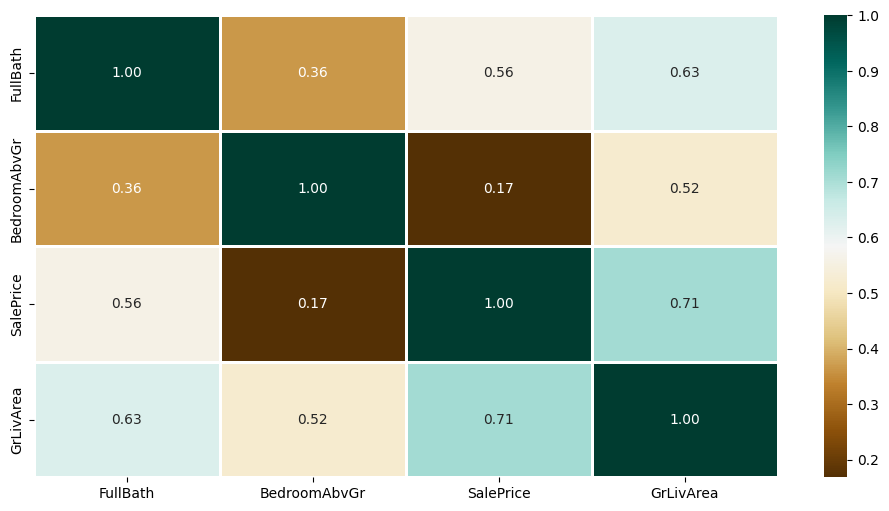

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

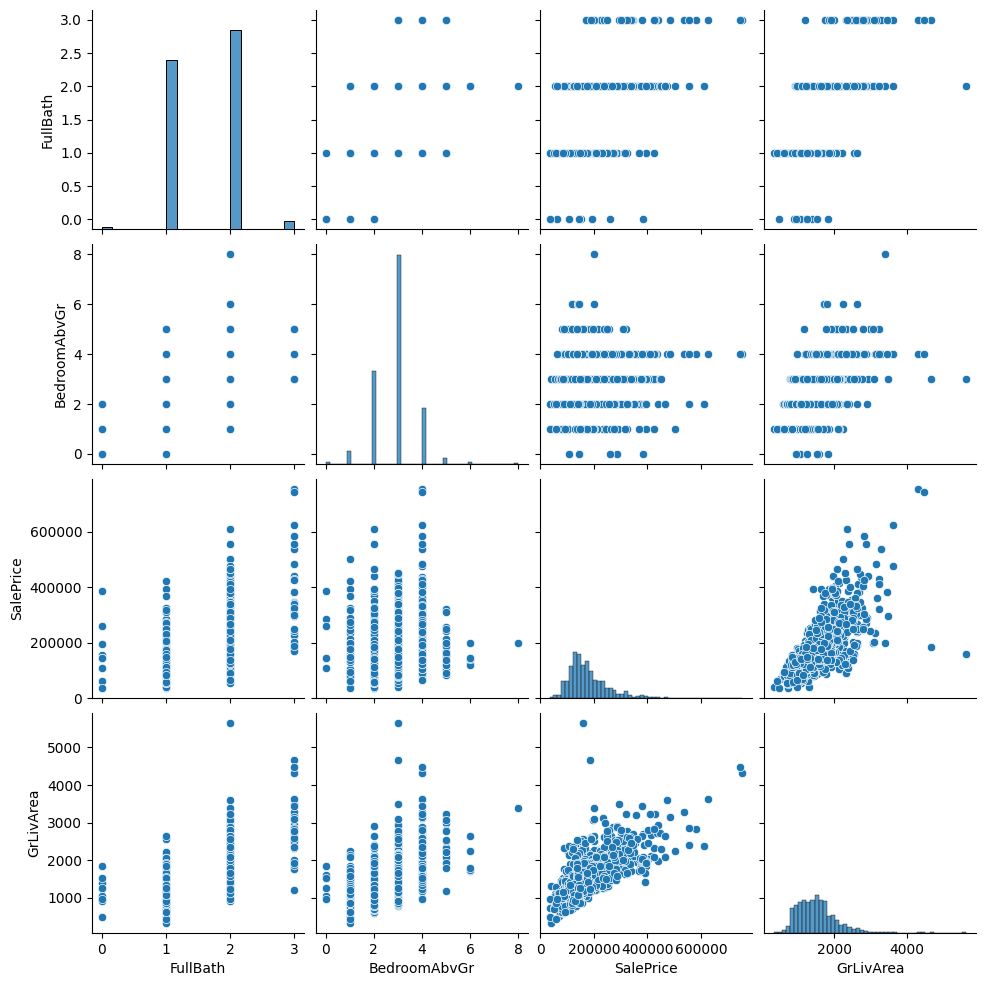

In [21]:
sns.pairplot(df)


<BarContainer object of 1460 artists>

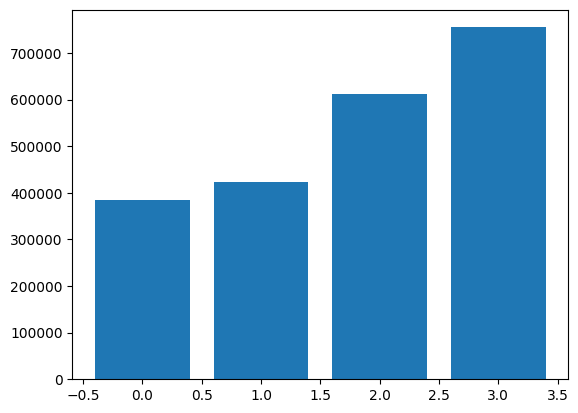

In [12]:
plt.bar(data['FullBath'],data['SalePrice'])


<BarContainer object of 1460 artists>

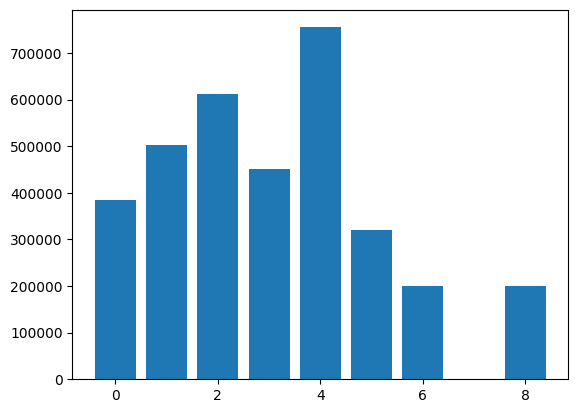

In [14]:
plt.bar(data['BedroomAbvGr'],data['SalePrice'])


<BarContainer object of 1460 artists>

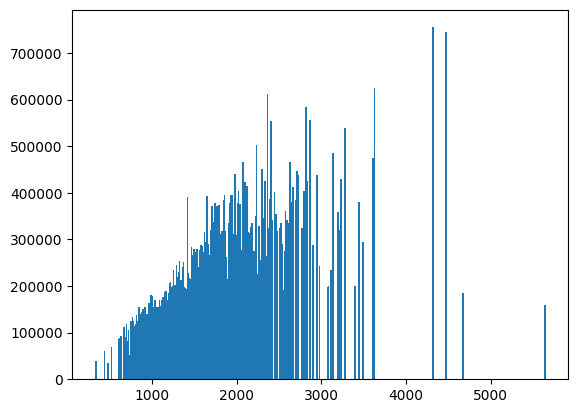

In [19]:
plt.bar(data['GrLivArea'],data['SalePrice'],width= 20)


<Axes: xlabel='SalePrice', ylabel='Density'>

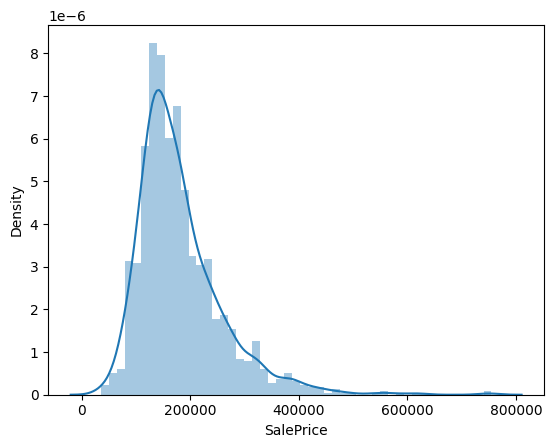

In [20]:
sns.distplot(data['SalePrice'])


**TRAIN LINEAR REGRESSION MODEL**

In [25]:
x =data[["GrLivArea","BedroomAbvGr","FullBath"]]
y = data.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**MODEL EVALUATION**

In [28]:
print(lm.intercept_)

49692.36498845433


In [30]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GrLivArea,117.687820
BedroomAbvGr,-29790.786540
FullBath,24980.234307


**PREDICTION**

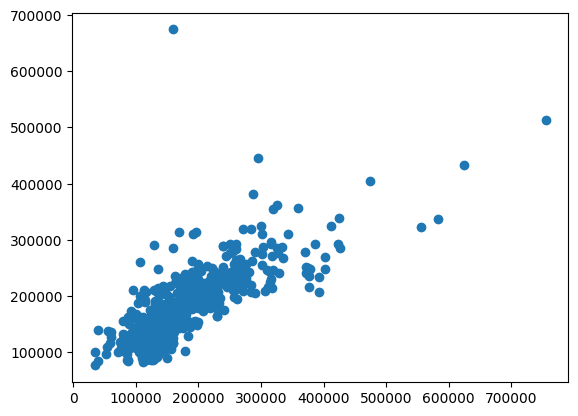

In [34]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)


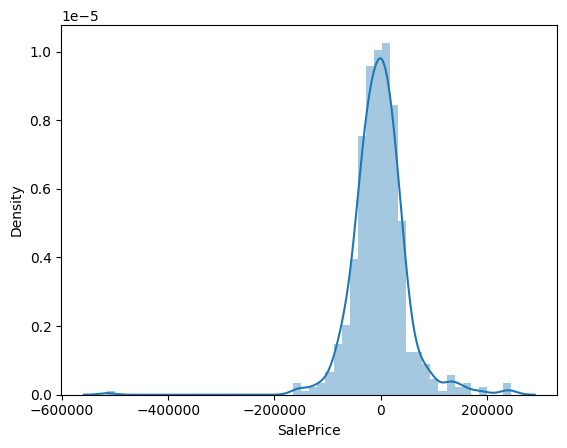

In [35]:
sns.distplot((y_test-y_pred),bins=50);


**Regression Evaluation Metrics**


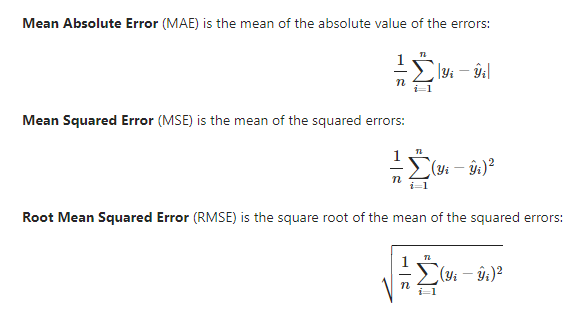


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 35095.79291480445
Mean Squared Error: 2795485563.0618753
Root Mean Squared Error: 52872.35159383281


In [40]:
test=pd.read_csv("test.csv")
X_test=test[["GrLivArea","BedroomAbvGr","FullBath"]]

In [42]:
Y_preds=lm.predict(X_test)
y=pd.DataFrame(Y_preds)


In [ ]:
y.to_csv("y_pred.csv")